# Top 250 Peliculas de IMDB

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

## Limpieza
Importar, revisar y limpiar los datos:

In [2]:
movies_df = pd.read_csv('./movies.csv')
movies_df.head(2)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

Eliminamos columnas que no necesitaremos:
 - movie_id
 - link
 - cast_id
 - director_id
 - writer_id
 - user_id
 - user_name
 - review_id
 - storyline
 - review_title
 - review_content

In [4]:
movies_df.drop(['movie_id', 'link', 'cast_id', 'director_id', 'writer_id', 'user_id', 'user_name', 'review_id', 'storyline', 'review_title', 'review_content'], axis=1, inplace=True)
movies_df.head(2)

,rank,title,year,imbd_votes,imbd_rating,certificate,duration,genre,cast_name,director_name,writer_name
0,1,The Shawshank Redemption,1994,"2,711,075",9.3,R,2h 22m,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,"1,882,829",9.2,R,2h 55m,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Richard S. ...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"


La función `casting_time` cambia el formato de la vaiable `time` a un valor numérico con el cuál podremos trabajar más delante si así se requiere.

In [5]:
def casting_time(time):
    hm = re.sub(r'[^0-9]', ' ', time).split()
    hm = (float(hm[0]) * 60) if len(hm) == 1 else (float(hm[0]) * 60) + float(hm[1])
    return hm

In [6]:
movies_df['duration'] = movies_df['duration'].apply(casting_time)
movies_df.head(2)

,rank,title,year,imbd_votes,imbd_rating,certificate,duration,genre,cast_name,director_name,writer_name
0,1,The Shawshank Redemption,1994,"2,711,075",9.3,R,142.0,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,"1,882,829",9.2,R,175.0,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Richard S. ...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"


In [7]:
genres_set = { genre for genres in movies_df.genre for genre in genres.split(',') }


In [8]:
genre_dict = { 
    'genre': [],
    'year': [],
    'total': [],
    'rating': []
}

for genre in genres_set:
    year_genre = movies_df.year.loc[movies_df.genre.str.contains(genre)].value_counts()
    year_genre = movies_df.imbd_rating.loc[movies_df.genre.str.contains(genre)].mean()
    gen_name = [ f'{genre}' for xx in range(len(year_genre))]

    genre_dict["genre"].extend(gen_name)
    genre_dict["year"].extend(list(year_genre.index))
    genre_dict["total"].extend(list(year_genre.values))
    genre_dict["rating"].extend(list(year_genre.values))


genre_df = pd.DataFrame(genre_dict)
genre_df

,genre,year,total
0,Adventure,1975,4
1,Adventure,2003,3
2,Adventure,2010,3
3,Adventure,2001,3
4,Adventure,2009,2
...,...,...,...
446,Western,2012,1
447,Western,1965,1
448,Western,1992,1
449,Western,1948,1


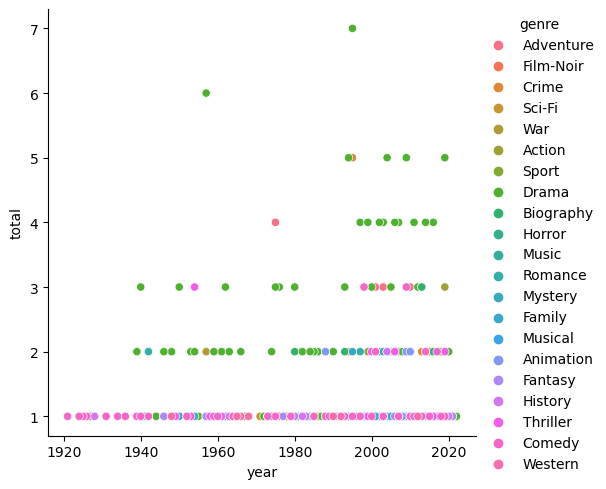

In [17]:
sns.relplot(data=genre_df, x='year', y='total', hue='genre');

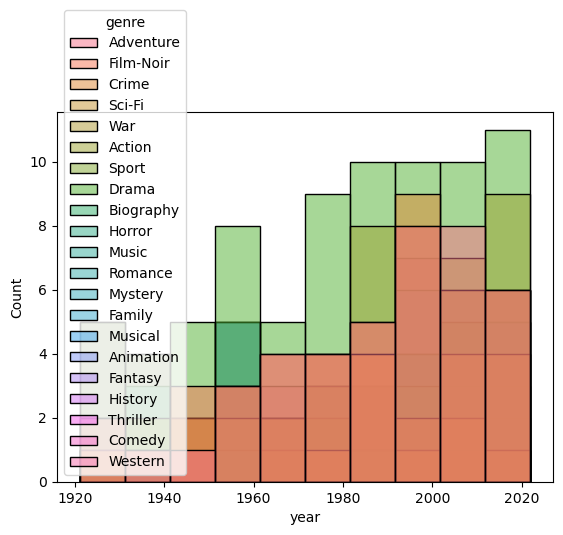

In [46]:

sns.histplot(data=genre_df, x='year', hue='genre');

Text(0.5, 1.0, 'Conteo de peliculas por genero')

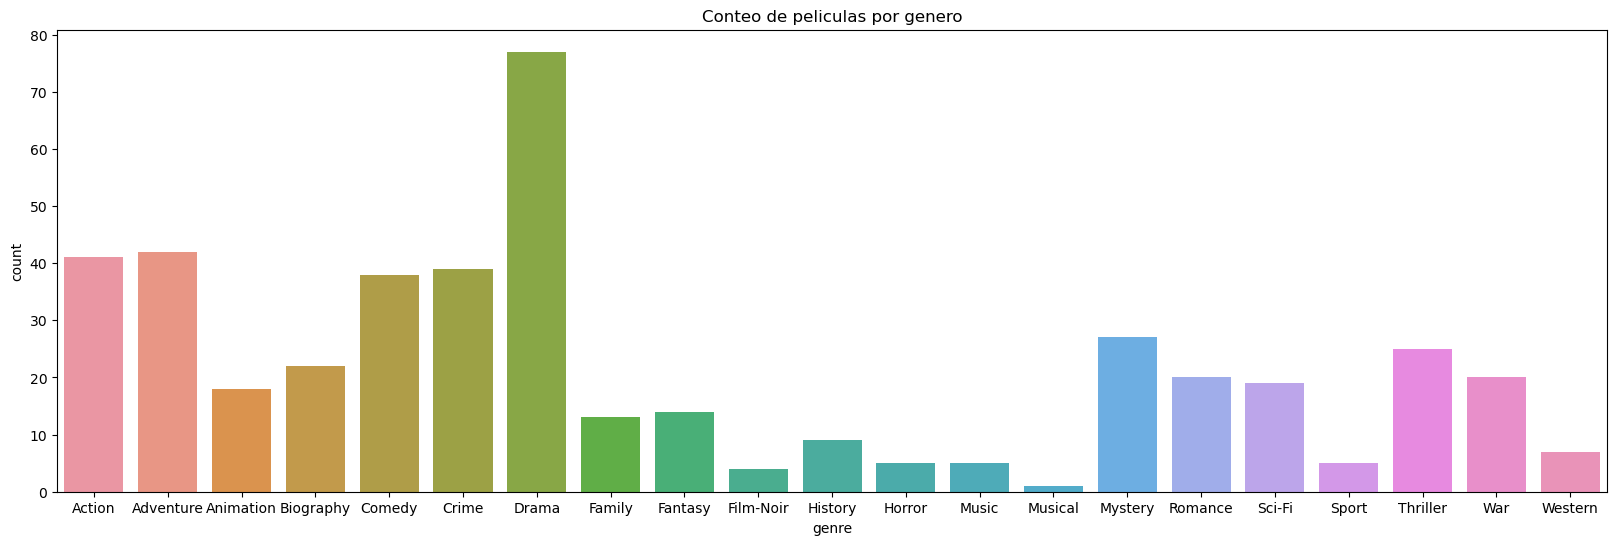

In [62]:
plt.figure(figsize=(20,6))
sns.countplot(data=genre_df, x='genre');
plt.title('Conteo de peliculas por genero')